<a href="https://colab.research.google.com/github/raulcho94527/080223/blob/master/STG_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import torch

In [50]:
from keras.datasets import mnist

train, test = mnist.load_data()
mnist_train_X , mnist_train_y = train
mnist_test_X ,  mnist_test_y = test
mnist_train_X = mnist_train_X /255.0
mnist_test_X = mnist_test_X /255.0

In [51]:
X_train, y_train = mnist_train_X , mnist_train_y
X_valid, y_valid = mnist_test_X , mnist_test_y
X_train = (X_train.reshape(-1,784))
X_valid = (X_valid.reshape(-1,784))

In [52]:
y_train_3 = [label == 3 for label in y_train] 
y_train_8 = [label ==8 for label in y_train]

In [53]:
X_train_3 = [X_train[idx] for idx, label in enumerate(y_train_3) if label == True]
X_train_8 = [X_train[idx] for idx , label in enumerate(y_train_8)if label == True]

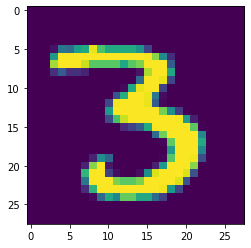

In [54]:
plt.imshow(X_train_3[2].reshape(28,28))

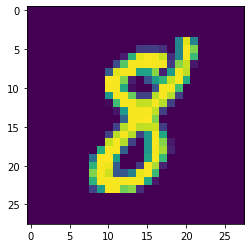

In [55]:
plt.imshow(X_train_8[2].reshape(28,28))

In [56]:
X_38 = np.concatenate((np.array(X_train_3), np.array(X_train_8)))

In [57]:
X_38.shape

(11982, 784)

In [58]:
y_38 = np.array([0 for i in X_train_3]+ [1 for i in X_train_8], dtype = np.int32)

In [59]:
y_38

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [60]:
y_38.shape

(11982,)

In [61]:
from sklearn.model_selection import train_test_split
X_train_38 , X_test_38 , y_train_38 , y_test_38 = train_test_split(X_38 , y_38 , test_size = 0.3)

In [62]:
y_train_38[:100]

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int32)

In [63]:
y_train_38.shape

(8387,)

In [64]:
X_train_38.shape

(8387, 784)

In [65]:
pip install stg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
args_cuda = torch.cuda.is_available()
device = torch.device("cuda" if args_cuda else "cpu") 
feature_selection = True
model = STG(task_type='classification',input_dim=X_train_38.shape[1], output_dim=2, hidden_dims=[500,50, 20], activation='tanh',
    optimizer='SGD', learning_rate=0.1, batch_size=100, feature_selection=feature_selection, sigma=0.5, lam=0.5, random_state=1, device=device) 

In [ ]:
model.fit(X_train_38, y_train_38 , nr_epochs = 3000, valid_X=X_test_38, valid_y=y_test_38 , print_interval=100)

/usr/local/lib/python3.7/dist-packages/stg/models.py:171: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  value = self.softmax(logits)


Epoch: 100: loss=0.384159 valid_loss=0.032002
Epoch: 200: loss=0.344535 valid_loss=0.040437
Epoch: 300: loss=0.319666 valid_loss=0.057212
Epoch: 400: loss=0.306072 valid_loss=0.049581
Epoch: 500: loss=0.296632 valid_loss=0.051937
Epoch: 600: loss=0.296774 valid_loss=0.060834
Epoch: 700: loss=0.292756 valid_loss=0.047191
Epoch: 800: loss=0.290354 valid_loss=0.048774
Epoch: 900: loss=0.288976 valid_loss=0.056975
Epoch: 1000: loss=0.288151 valid_loss=0.054504
Epoch: 1100: loss=0.286091 valid_loss=0.055870
Epoch: 1200: loss=0.285930 valid_loss=0.044229
Epoch: 1300: loss=0.286016 valid_loss=0.060317
Epoch: 1400: loss=0.285247 valid_loss=0.053764
Epoch: 1500: loss=0.288659 valid_loss=0.052900
Epoch: 1600: loss=0.286506 valid_loss=0.046013
Epoch: 1700: loss=0.285534 valid_loss=0.065060
Epoch: 1800: loss=0.285154 valid_loss=0.042329
Epoch: 1900: loss=0.285575 valid_loss=0.056821
Epoch: 2000: loss=0.286326 valid_loss=0.050589
Epoch: 2100: loss=0.284111 valid_loss=0.061283


In [ ]:
gate = model.get_gates(mode='prob')

In [ ]:
plt.imshow(1-gate.reshape(28,28))